In [36]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pydot
from graphviz import Source

%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 8)
pd.options.display.float_format = '{:.2f}'.format

## Что мы рассмотрим сегодня:
- решающие деревья, общая парадигма
- критерии разбиения датасета
- специальные алгоритмы построения деревьев


# Деревья решений

| Outlook | Temperature | Humidity | Wind | Play |
| --- | --- | --- | --- | --- |
|Sunny | 85 | 85 | false | no |
|Sunny | 80 | 90 | true | no |
|Overcast | 83 | 86 | false | yes |
|Rainy | 70 | 96 | false | yes |
|Rainy | 68 | 80 | false | yes |
|Rainy | 65 | 70 | true | no |
|Overcast | 64 | 65 | true | yes |
|Sunny | 72 | 95 | false | no |
|Sunny | 69 | 70 | false | yes |
|Rainy | 75 | 80 | false | yes |
|Sunny | 75 | 70 | true | yes |
|Overcast | 72 | 90 | true | yes |
|Overcast | 81 | 75 | false | yes |
|Rainy | 71 | 91 | true | no |

<img src="./../pics/golf.png">

<img src="./../pics/obama.jpg">

Дерево решений (Decision Tree) - это связный ациклический граф (DAGs - Directed Acyclic Graphs). В нем можно выделить 3 типа вершин:
1. Корневая вершина (root node) -  откуда все начинается
2. Внутренние вершины (intermediate nodes)
3. Листья (leafs) - самые глубокие вершины дерева, в которых содержится "ответ"

Во внутренней или коневой вершине признак проверяется на некий логический критерий, по результатам которого мы движемся все глубже

<img src="./../pics/creditdecisiontree.png">

## Задание.

Какие вопросы возникают при построении деревьев?

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

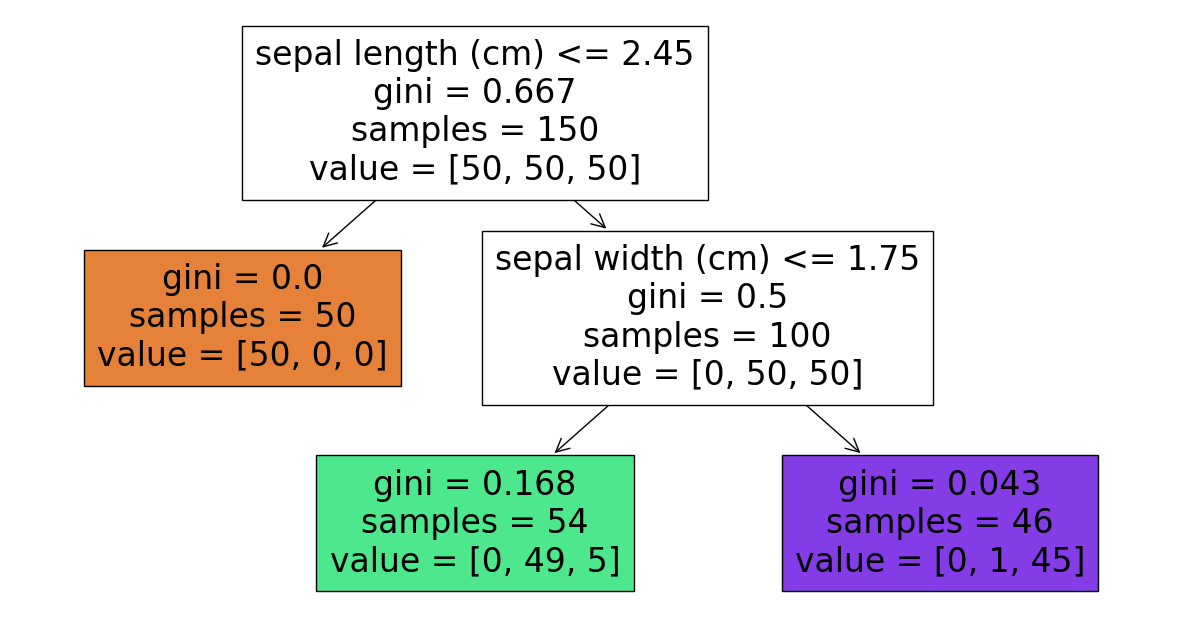

In [3]:
tree.plot_tree(tree_clf, feature_names=iris.feature_names, filled=True)
plt.show()

В корневой ноде дерево решило начать строить разбиение по длине листа (Sepal Length). Если выполняются определенные условия мы попадаем в другие ноды, одна из которых делится на 2 части. Коэффициент джинни - это критерий принятия решения для модели деревьев (на основании которого принимается решение делить ли нам дальше дерево или остановиться на том, что у нас есть). Коэффициент джинни - по простому это коэффициент, который показывает, насколько сейчас у вас ваши классы смешанны друг с другом. Чем этот коэффициент выше, тем больше смешаны ваши классы.

In [5]:
from io import StringIO


golf = StringIO("""Outlook,Temperature,Humidity,Wind,Play
Sunny,85,85,false,no
Sunny,80,90,true,no
Overcast,83,86,false,yes
Rainy,70,96,false,yes
Rainy,68,80,false,yes
Rainy,65,70,true,no
Overcast,64,65,true,yes
Sunny,72,95,false,no
Sunny,69,70,false,yes
Rainy,75,80,false,yes
Sunny,75,70,true,yes
Overcast,72,90,true,yes
Overcast,81,75,false,yes
Rainy,71,91,true,no
""")

df = pd.read_csv(golf, sep=',')

In [6]:
df

,Outlook,Temperature,Humidity,Wind,Play
0,Sunny,85,85,False,no
1,Sunny,80,90,True,no
2,Overcast,83,86,False,yes
3,Rainy,70,96,False,yes
4,Rainy,68,80,False,yes
5,Rainy,65,70,True,no
6,Overcast,64,65,True,yes
7,Sunny,72,95,False,no
8,Sunny,69,70,False,yes
9,Rainy,75,80,False,yes


In [7]:
X = df[['Outlook', 'Temperature', 'Humidity', 'Wind']] 
y = df[['Play']]
tree_clf = DecisionTreeClassifier(max_depth=2)

In [8]:
X

,Outlook,Temperature,Humidity,Wind
0,Sunny,85,85,False
1,Sunny,80,90,True
2,Overcast,83,86,False
3,Rainy,70,96,False
4,Rainy,68,80,False
5,Rainy,65,70,True
6,Overcast,64,65,True
7,Sunny,72,95,False
8,Sunny,69,70,False
9,Rainy,75,80,False


<br>


-------

Важная особенность деревьев. Как вы помните, для всех наших предыдущих моделей для классификации (и не только) мы все категориальные переменные должны были закодировать при помощи OneHotEncoder.
Для чего мы так делали?

-------

<br>

<br>


В чем один из плюсов Деревьев Решений - они могут работать с категориальными переменными, то есть в том виде, в котором они изначальной представлены.
Кроме того нам еще и не нужно шкалировать нашы непрерывные переменные в нашей матрице признаков.

Почему?)

In [9]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

d = defaultdict(LabelEncoder)

X = np.c_[
    df[['Outlook', 'Wind']].apply(lambda x: d[x.name].fit_transform(x)).values,
    df[['Temperature', 'Humidity']].values
]

y = df[['Play']].values
print(X)
print(y)

[[ 2  0 85 85]
 [ 2  1 80 90]
 [ 0  0 83 86]
 [ 1  0 70 96]
 [ 1  0 68 80]
 [ 1  1 65 70]
 [ 0  1 64 65]
 [ 2  0 72 95]
 [ 2  0 69 70]
 [ 1  0 75 80]
 [ 2  1 75 70]
 [ 0  1 72 90]
 [ 0  0 81 75]
 [ 1  1 71 91]]
[['no']
 ['no']
 ['yes']
 ['yes']
 ['yes']
 ['no']
 ['yes']
 ['no']
 ['yes']
 ['yes']
 ['yes']
 ['yes']
 ['yes']
 ['no']]


In [10]:
o = d['Outlook']

In [11]:
o.classes_

array(['Overcast', 'Rainy', 'Sunny'], dtype=object)

In [12]:
tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=3)

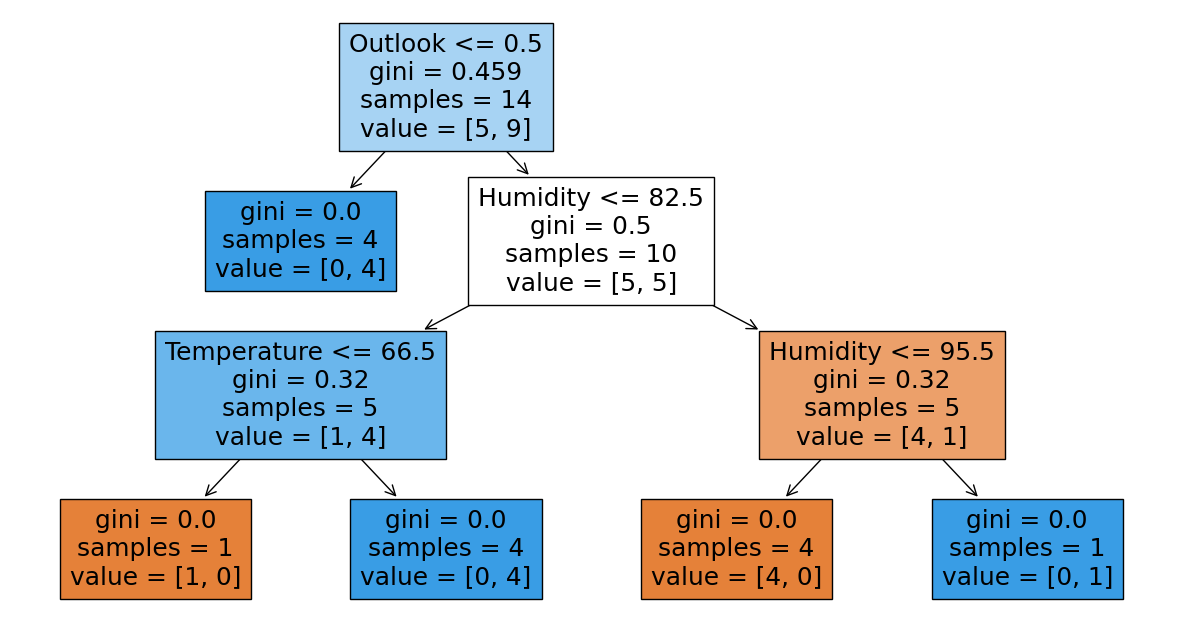

In [13]:
tree.plot_tree(tree_clf, feature_names=['Outlook', 'Wind', 'Temperature', 'Humidity'], filled=True)
plt.show()

Что получается?

Если мы не зададим глубину дерева, то оно просто подстроиться под наш тренировочный датасет.
То есть произойдет переобучение. Это главный минус алгоритма деревьев решений.

Почему плохо разделять дерево до конца?

# Псевдокод алгоритма

```{python}
function decision_tree(X_N):
	if X_N satisfies leaf criterion:
		L = create_leaf(X_N)
		assign_class(L)
	else:
		L = create_node(X_N)
		X_1,..,X_S = split(L)
		for i in 1..S:
			C = decision_tree(X_i)
			add_child(L, C)
	return L  
```

# CART - Classification And Regression Trees
1. Как происходит разделение?
2. На сколько детей разделять каждый узел?
3. Какой критерий листа выбрать?
4. Как выбрать класс каждого листа?
5. Что делать, если часть значений отсутствует?

# Как делать разбиение?

Предположим, что у нас с вами 2 переменные - х1 и у1. И мы как обычно, хотим решить с вами задачу бинарной классификации. У нас есть черные точки и синие квадраты. Что мы теперь хотим сделать?

!<img src="./../pics/DT1.png">

В идеале, мы хотим провести 2 оптимальных разделения и сказать что если х1 больше чем какое-то пороговое значение и у1 больше чем другое пороговое значение, то это синий класс, если иначе, то это черный класс. Что же будет делать алгоритм дерева?

!<img src="./../pics/DT2.png">

В первую очередь оно попробует взять переменную х1 и попробует определить, что будет если в данном случае выборка будет разбита так, как представленно ниже?

То есть если х1 больше красная линия - это будет отнесено к одному классу, если меньше к другому. У нас есть определенный критерий и если мы его посчитаем и скажем, что при таком разделении 9 синих классов, но слева осталось 3 синих класса. Тогда при таком разбиении критерий покажет (критерий информативности джинни), что мы выполнили задачу не до конца и алгоритм продолжит искать другое разделение по другому пороговому значению.

!<img src="./../pics/DT3.png">

Окей разбили по параметру х1 по такому пороговому значению и получили идеальную ситуацию, где весь синий класс оказывается за пределами порогового значения. В данном случае коэффициент загрязненности (информативности) джинни равен 0. Мы нашли оптимальное разбиение по х1.

!<img src="./../pics/DT4.png">

Берем следующую переменную по у1 и проделываем туже логику как и с переменной х1.


А как мы будем мерить меру неопределенности при разбиении?


На практике таких вариантов очень много, начиная от простых метрик, заканчивая более изощренными методами.

<img src="./../pics/DT5.png">

<img src="./../pics/DT6.png">

### Меры неопределенности (impurity measures)

Пусть $p_k$ - это доля класса $C_k$ в узле дерева $S$.

1. Missclassification error  
$$i(N) = 1 - \max_k p(x \in C_k)$$
2. Gini impurity
$$i(N) = 1 - \sum_k p^2(x \in C_k) = \sum_{i \neq j} p(x \in C_i) p(x \in C_j)$$
https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity 

3. Информационная энтропия
$$i(N) =  -\sum_k p(x \in C_k) \log_2 p(x \in C_k)$$


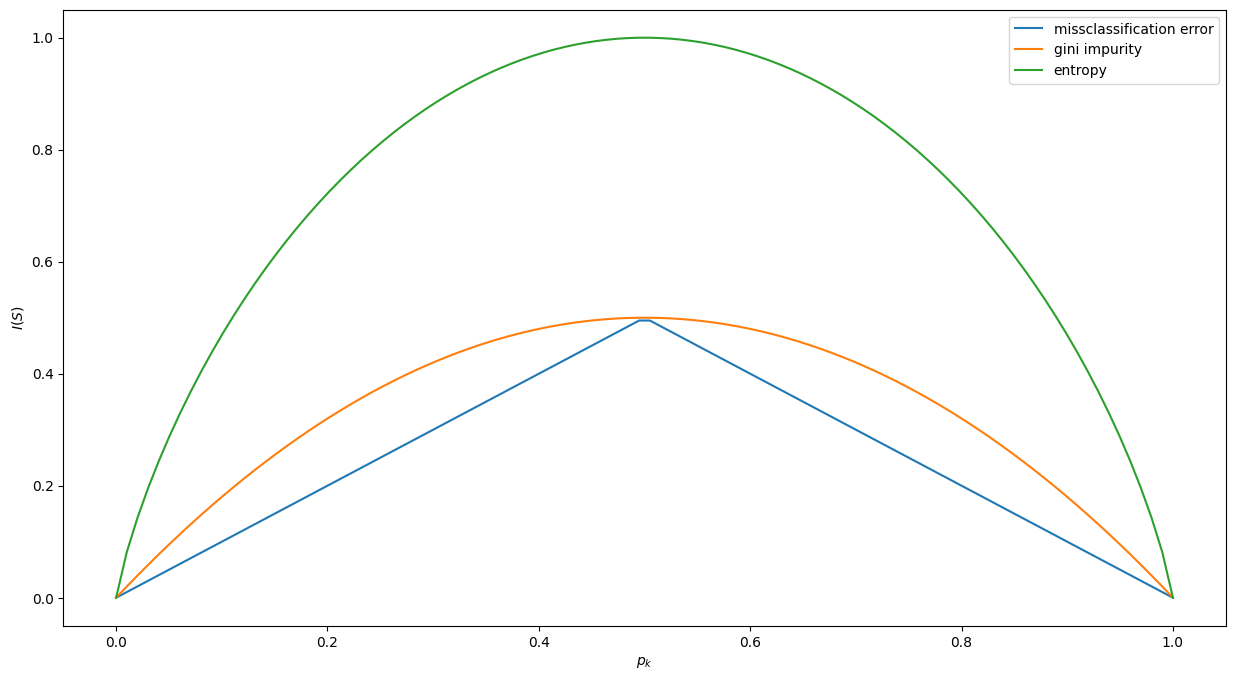

In [24]:
def plot_impurities():
    threshold = 0.000001
    p = np.linspace(0, 1, 100)
    p = np.c_[p, 1-p]

    missclass = 1 - p.max(axis=1)
    plt.plot(p[:,0], missclass, label = 'missclassification error')

    gini = 1 - (p ** 2).sum(axis=1)
    plt.plot(p[:,0], gini, label = 'gini impurity')

    entropy = - np.nansum((p * np.log2(np.clip(p, threshold, 1 - threshold))), axis=1)
    plt.plot(p[:,0], entropy, label = 'entropy')

    plt.xlabel('$p_k$')
    plt.ylabel('$I(S)$')
    plt.legend()
    
plot_impurities()

<img src="./../pics/DS1.png">

In [14]:
n = 10

<img src="./../pics/DS3.png">

In [25]:
ME_1_left = 1 - 5/5
ME_1_left # 0

0.0

In [26]:
ME_1_right = 1 - 3 / 5
ME_1_right # 4/10

0.4

<img src="./../pics/DS2.png">

In [27]:
ME_2_left = 1 - 7/7
ME_2_left

0.0

In [28]:
ME_2_right = 1 - 3/3
ME_2_right

0.0

<img src="./../pics/DS1.png">

In [19]:
ME_all = 1 - 7 / 10
ME_all

0.30000000000000004

### Прирост информации

Выбрать признак и точку отсечения такими, чтобы было максимально уменьшение $impurity$. Наш главный критерий, по которому мы принимаем решение, где нам необходимо разделить нашу выборку. Мы будем последовательно по различным вариантам разбиения определенного признака считать Information Gain он же Прирост информации. Как его считать: мы будем брать наш Impurity изначальный, который был в выборке (ME_all=30%), теперь вычитаем из него 2 взвешенных меры загрязненности от получившегося разбиения (пример сверху). Почему взвешиваем - если бы не делали то делили каждый раз по одному объекту, таким образом наш прирост информации менее чувсвителен к масштабу прироста.

$$Information Gain = \Delta i(N, N_L, N_R) = i(N) - \frac {N_L}{N} i(N_L) - \frac {N_R}{N} i(N_R)$$

* Стратегия выбора - жадная
* Как определяется порог при вещественных признаках?
* Локальная оптимизация - уменьшение Impurity внутри узла
* Результаты не сильно зависят от выбора самой меры неопределенности


In [37]:
# 1
ME_all - ((5 / n) * ME_1_left - (5 / n) * ME_1_right)

0.5

In [21]:
(5 / n) * ME_1_left, (5 / n) * ME_1_right

(0.0, 0.2)

In [38]:
# 2
ME_all - ((7 / n) * ME_2_left - (3 / n) * ME_2_right)

0.30000000000000004

In [23]:
(7 / n) * ME_2_left, (3 / n) * ME_2_right

(0.0, 0.0)

## Рассчет разбиения в выборке

In [29]:
df[['Temperature', 'Play']]

,Temperature,Play
0,85,no
1,80,no
2,83,yes
3,70,yes
4,68,yes
5,65,no
6,64,yes
7,72,no
8,69,yes
9,75,yes


In [30]:
df[['Temperature', 'Play']].sort_values('Temperature')

,Temperature,Play
6,64,yes
5,65,no
4,68,yes
8,69,yes
3,70,yes
13,71,no
7,72,no
11,72,yes
9,75,yes
10,75,yes


### Если разделение не бинарное

Естественный выбор при разделении на $B$ детей
$$\Delta i(N, N_1, \ldots, N_B) = i(N) - \sum_{k=1}^B \frac{N_k}{N} i(N_k) \rightarrow \max$$

Предпочтение отдается большим $B$. Модификация:
$$\Delta i_B(N, N_1, \ldots, N_B) = \frac{\Delta i(N, N_1, \ldots, N_B)}{-\sum_{k=1}^B \frac{N_k}{N} \log_2 \frac{N_k}{N}} \rightarrow \max$$


## Задание.

Проблемой данного алгоритма является переобучение. Каким образом можно избежать переобучения?

## Критерии останова (регуляризация)

* Никогда
* Задать порог по мере неопределенности: $I(S) \leq \theta$
* Задать порог по размеру узла: $|S| \leq n$
* Задать порог на глубину: $Depth(S) = d$
* Задать порог на размер потомков: $|S_L| \leq n_1 \& |S_R| \leq n_2$
* Использовать валидационную выборку
* ...

In [32]:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, random_state=None,
            splitter='best')

DecisionTreeClassifier(max_depth=3)

## Регрессия

Для задачи регрессии в качестве меры неопределенности могут выступать

* Среднее квадратичное отклонение от среднего
$$ I(S) = \frac{1}{|S|}\sum\limits_{i \in S}(y_i - \bar{y_S})^2 $$
* Среднее абсолютное отклонение от медианы
$$ I(S) = \frac{1}{|S|}\sum\limits_{i \in S}|y_i - \bar{y_S}| $$

<img src="./../pics/housing.png">

## Как определяется ответ?

* Классификация
    * Класс с большинством в листе
    * Доли каждого из классов в листе
* Регрессия
    * Среднее (медиана) целевой переменной в листе

# Demo
http://www.r2d3.us/visual-intro-to-machine-learning-part-1/

## Важность признаков

В деревьях решений производится автоматический отбор признаков.

Пусть $v(S)$ - это признак, который использовался для ветвления в узле $S$

$$ \text{imp}(A) = \sum\limits_{i: v(S_i) = A} \frac{|S_i|}{|S|} Gain(S_i, A) $$

Decrease in node impurity weighted by the probability of reaching that node (number of samples that reach the node, divided by the total number of samples)

## Вычислительная сложность

Выборка состоит из $n$ объектов, описанных $m$ признаками

Предположения
* Узлы делятся примерно поровну
* Дерево имеет $\log n$ уровней
* Признаки бинарные

Обучение. Для узла с $k$ обучающими объектами:

Вычисление impurity по одному признаку $O(k)$

Выбор разделяющего признака $O(mk)$

Итог: $O(mn) + 2 O(m \frac{n}{2}) + 4 O(m \frac{n}{4}) + \ldots = O(m n \log n)$

Применение. $O(\log n)$

## Отсутствующие значения

* Удалить объекты из выборки
* Использовать отстутсвие как отдельную категорию
* Вычислять impurity, пропуская отсутствующие значения
* Заменить пропуски медианой/0/средним значением

## Специальные алгоритмы построения деревьев
 
 
** ID 3 **
* Только категориальные признаки
* Количество потомков = количеству значений признака
* Строится до максимальной глубины

** С 4.5 **
* Поддержка вещественных признаков
* Категориальные как в ID3
* При пропуске значения переход по всем потомкам
* Удаляет избыточные ветвления

** СART **
* В основном сегодняшнее занятие про него
* Специальная процедура усещения дерева после построения (post prunning) на основе сложности вершины и насколько эта вершина уменьшает энтропию


**Плюсы:**
 - Порождение четких правил классификации, понятных человеку, например, "если возраст < 25 и интерес к мотоциклам, отказать в кредите"
 - Деревья решений могут легко визуализироваться
 - Относительно быстрые процессы обучения и классификации
 - Малое число параметров модели 
 - Поддержка и числовых, и категориальных признаков
 
**Минусы:**
 - Разделяющая граница, построенная деревом решений, имеет свои ограничения (состоит из гиперкубов), и на практике дерево решений по качеству классификации уступает некоторым другим методам
 - Необходимость отсекать ветви дерева (pruning) или устанавливать минимальное число элементов в листьях дерева или максимальную глубину дерева для борьбы с переобучением. Впрочем, переобучение - проблема всех методов машинного обучения
 - Нестабильность. Небольшие изменения в данных могут существенно изменять построенное дерево решений. С этой проблемой борются с помощью ансамблей деревьев решений 
 - Используются эвристики типа жадного поиска признака с максимальным приростом информации, которые не гарантируют нахождения глобально оптимального дерева
 - Сложно поддерживаются пропуски в данных. 

/var/folders/91/k98801wn6yd0ssq44m34fwlh0000gn/T/ipykernel_64926/3775220226.py:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/var/folders/91/k98801wn6yd0ssq44m34fwlh0000gn/T/ipykernel_64926/3775220226.py:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/var/folders/91/k98801wn6yd0ssq44m34fwlh0000gn/T/ipykernel_64926/3775220226.py:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/var/folders/91/k98801wn6yd0ssq44m34fwlh0000gn/T/ipykernel_64926/3775220226.py:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/var/folders/91/

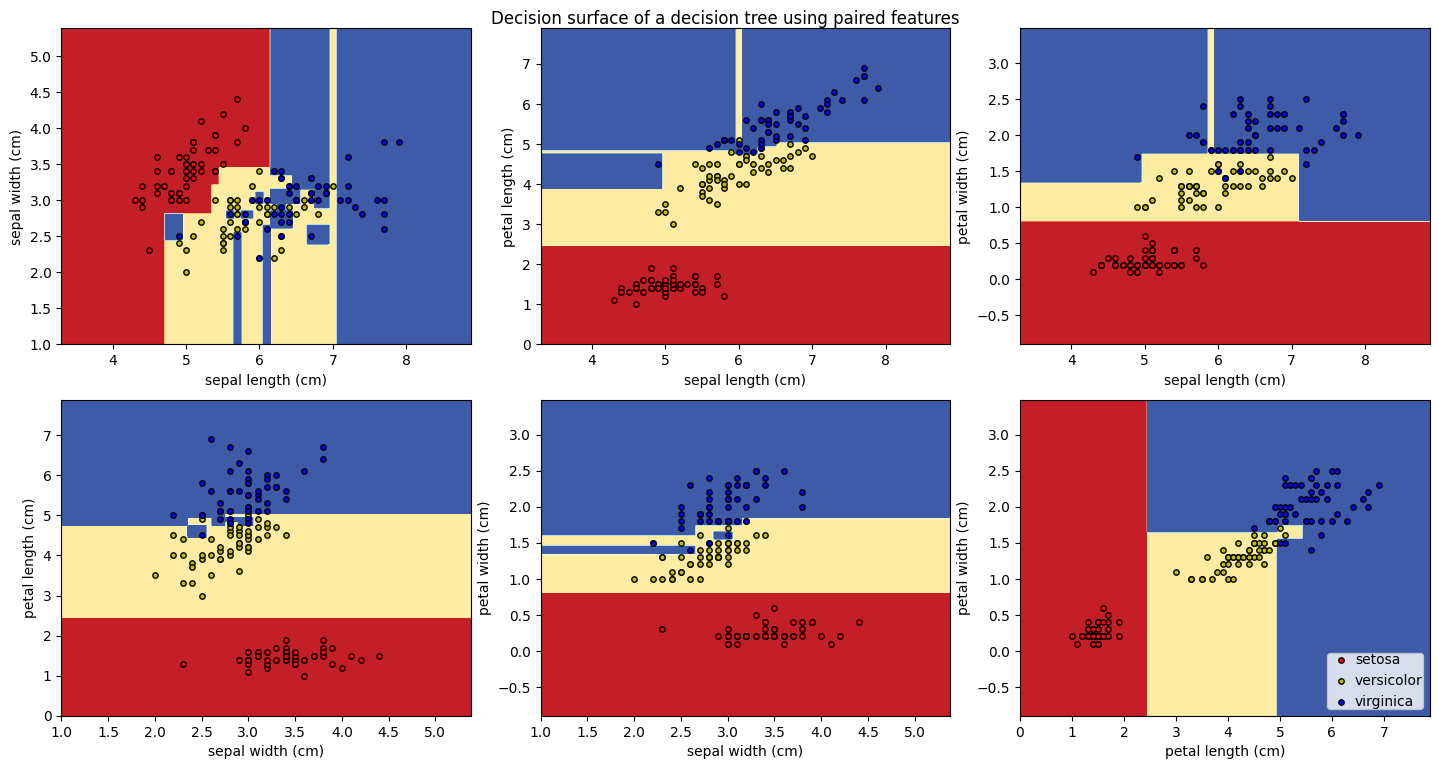

In [33]:
# http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#sphx-glr-auto-examples-tree-plot-iris-py
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

/var/folders/91/k98801wn6yd0ssq44m34fwlh0000gn/T/ipykernel_64926/3714239074.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/var/folders/91/k98801wn6yd0ssq44m34fwlh0000gn/T/ipykernel_64926/3714239074.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/var/folders/91/k98801wn6yd0ssq44m34fwlh0000gn/T/ipykernel_64926/3714239074.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/var/folders/91/k98801wn6yd0ssq44m34fwlh0000gn/T/ipykernel_64926/3714239074.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/var/folders/91/

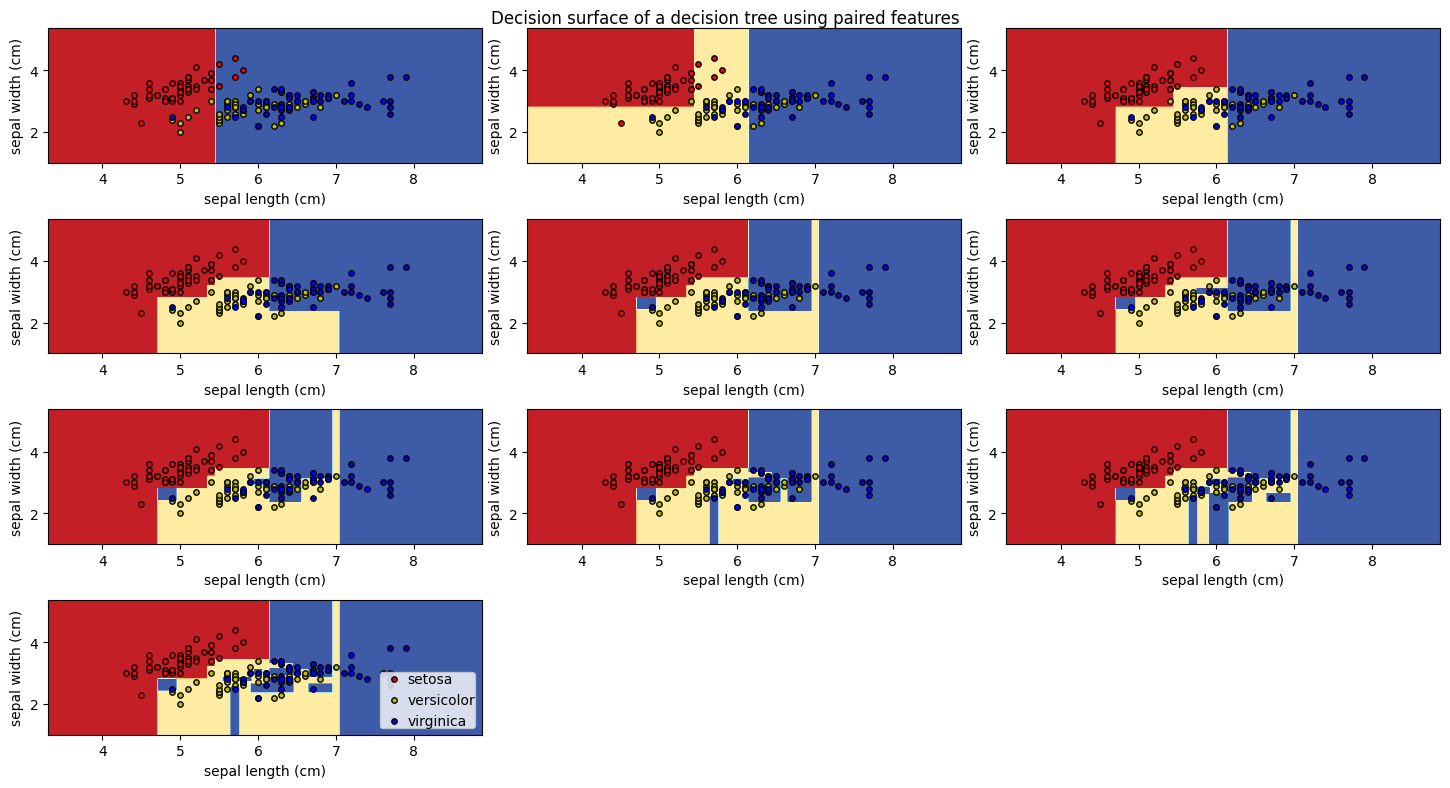

In [34]:
pair = [0, 1]
# We only take the two corresponding features
X = iris.data[:, pair]
y = iris.target

for d in range(10):
    # Train
    clf = DecisionTreeClassifier(max_depth=d+1).fit(X, y)

    # Plot the decision boundary
    plt.subplot(4, 3, d + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

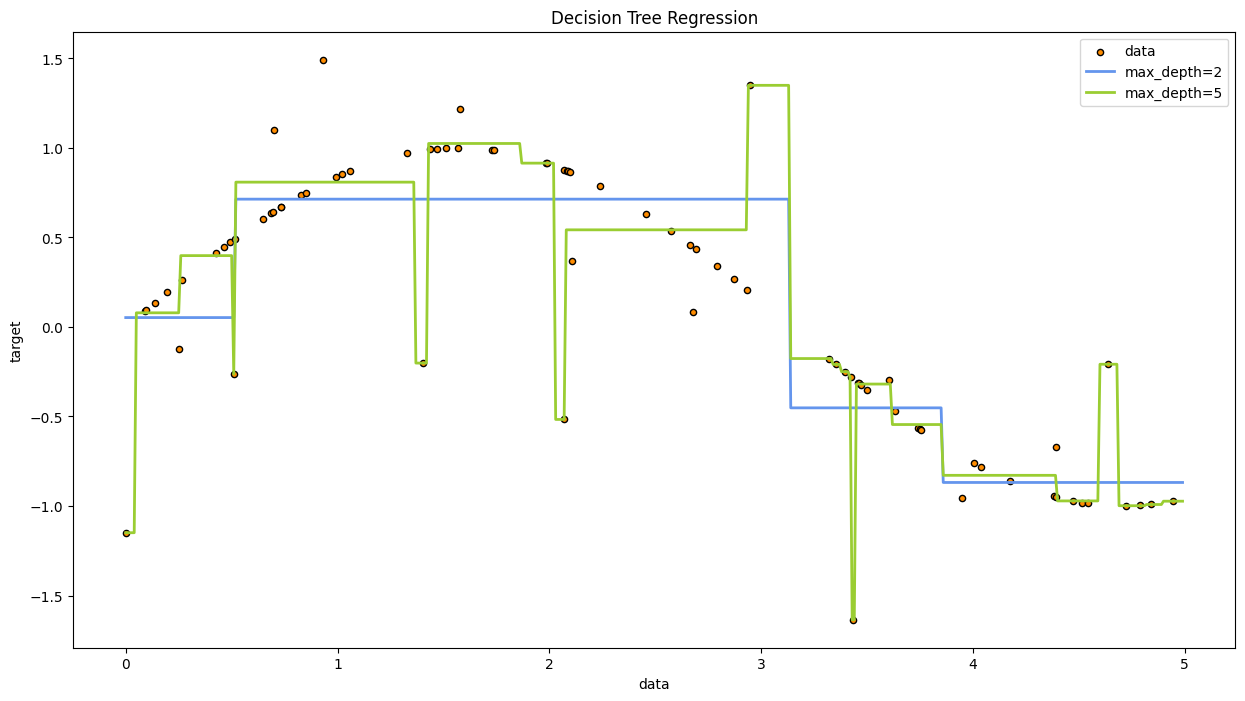

In [35]:
# http://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()